In [1]:
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
import cv2
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile

#### Face matching

In [18]:
# Already extracted from original zipfile
#os.chdir(r'C:\Users\hanson\Downloads')
#with ZipFile('att_faces.zip', 'r') as k: 
#    k.extractall(r'C:\Users\hanson\Documents\personal\PCA')

In [2]:
os.chdir(r'C:\Users\hanson\Documents\personal\PCA')
imgs = {}
i = 0
for x in os.listdir(r'C:\Users\hanson\Documents\personal\PCA'):
    os.chdir(r'C:\Users\hanson\Documents\personal\PCA')
    for y in os.listdir(x):
        os.chdir(r'C:\Users\hanson\Documents\personal\PCA\{}'.format(x))
        imgs[i]=cv2.imread(y,0)
        i+=1

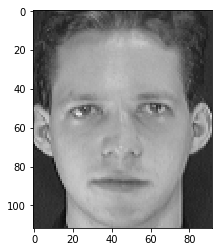

In [3]:
os.chdir(r'C:\Users\hanson\Documents\personal\PCA\s1')
img = cv2.imread('1.pgm')
plt.imshow(img)

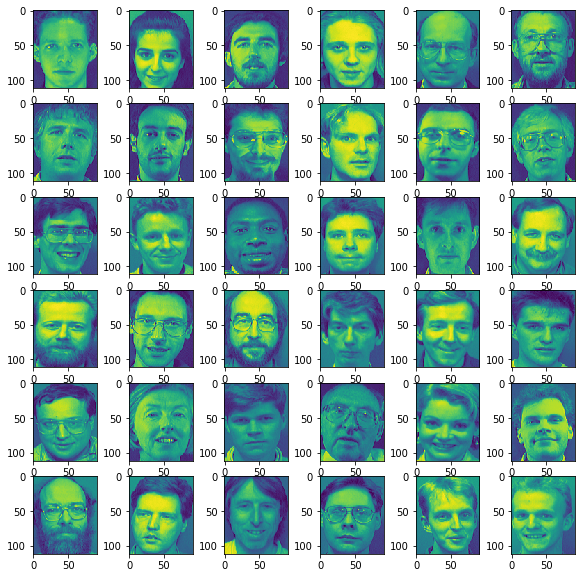

In [4]:
os.chdir(r'C:\Users\hanson\Documents\personal\PCA\s1')
fig,ax = plt.subplots(6,6,figsize=(10,10))
i=0
for x in range(6):
    for y in range(6):
        ax[x,y].imshow(imgs[i])
        i+=10
    

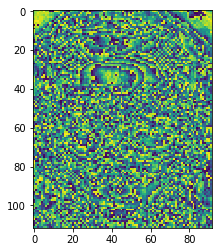

In [5]:
# Computing average face vector
img=imgs[0].flatten()
for x in range(1,400,10):
    img+=imgs[x].flatten()
avg = (img/400)
avg_r = avg.reshape(112,92)
plt.imshow(avg_r)

In [6]:
# Splitting train, test sets
train = list(imgs.values())
test_x = train[1:400:10]
test=[]
for j in test_x:
    test.append(j.flatten()-avg)
del train[1:400:10]

In [7]:
phi = []
for x in train:
    phi.append(x.flatten()-avg)
B = np.vstack(phi)
S = (1/360)*np.dot(B,B.T)
eigval,eigvec= np.linalg.eig(S)

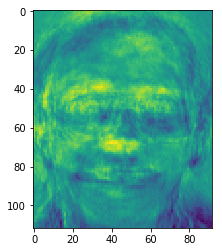

In [8]:
# U is upsampling eigenvectors of smaller dim matrix B*B.T into larger dim basis of eigenvectors of B.T*B
# U is merely reformatted eigenbasis thus
U = np.matrix(B.T)*np.matrix(eigvec.T)
plt.imshow(U[:,0].reshape(112,92))

In [9]:
# Projections of train, test matrices onto eigenbasis
T = np.vstack(test)
W_train = np.asarray(np.matrix(B)*np.matrix(U[:,:15]))
W_test = np.asarray(np.matrix(T)*np.matrix(U[:,:15]))

In [14]:
# Scoring function/metric
def d(u,v):
    return ((u-v)**2)**0.5
z = []
tot = []
for j,m in zip(*(W_train,[x for x in range(360)])):
    z.append(d(W_test[13],j))
for x in z:
    tot.append(np.sum(x))

In [15]:
np.argmin(np.asarray(tot))

122

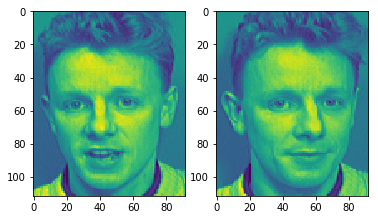

In [16]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(T[13].reshape(112,92))
ax[1].imshow(B[122].reshape(112,92))